In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
import sys
import seaborn as sns
import geopandas as gpd
import tqdm

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

plt.rcParams['axes.axisbelow'] = True

In [2]:
# Get the absolute path of the parent directory
# parent_dir = str(Path(__file__).resolve().parent.parent)

parent_dir = str(Path().cwd().parent)

# Add the parent directory to sys.path
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

# Now you can import the module as if it was in the same directory
import utils.aadt_predictor as ap

### Load data

In [3]:
HPMS_DIR = Path('../../data/processed_data/HPMS')
RANDOM_STATE = None
RESPONSE_VARS = ['AADT_MDV', 'AADT_HDV']
RF_PREDICTOR_VARS = ["STATEFP", "COUNTYFP", "F_SYSTEM", "THROUGH_LANES", "AADT"]

predictor = ap.AADTPredictor(HPMS_DIR / 'hpms_aadt_subset.csv', None, random_state = RANDOM_STATE)

Loading data from ../../data/processed_data/HPMS/hpms_aadt_subset.csv


/Users/aviralchawla/Library/CloudStorage/OneDrive-StJohn'sCollege/Work/CSDS/TRC/NearRoadExposure/scripts/utils/aadt_predictor.py:37: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data_full = pd.read_csv(self.data_path)


Full Data loaded successfully: 6677169 rows and 21 columns.
Pre-processing data...
ERROR: The data could not be subsetted. [None]
ERROR: The data could not be loaded. 'NoneType' object has no attribute 'shape'


In [4]:
ERROR_SCOPE = np.concatenate([np.arange(0, 0.01, 0.001), np.arange(0.01, 0.1, 0.005)])

In [5]:
results_AADT_perturb = []

for response_var in RESPONSE_VARS:

    predictor.response_var = response_var
    predictor.subset_train_data()

    for error in tqdm.tqdm(ERROR_SCOPE):

        for run in range(5):
            
            predictor.split_data(RF_PREDICTOR_VARS, state_fips= None, test_size=0.2)
            predictor.initialize_model('Random Forest', n_jobs = -1)

            # perturb total AADT
            predictor.X_train['AADT'] = predictor.X_train['AADT'] * (1 +  np.random.normal(-error, error, predictor.X_train.shape[0]))
            predictor.X_test['AADT'] = predictor.X_test['AADT'] * (1 +  np.random.normal(-error, error, predictor.X_test.shape[0]))

            predictor.fit_model()

            y_pred = predictor.model.predict(predictor.X_test)

            r2 = r2_score(predictor.y_test, y_pred)
            mse = mean_squared_error(predictor.y_test, y_pred)
            mae = mean_absolute_error(predictor.y_test, y_pred)

            results_AADT_perturb.append({
                'response_var': response_var,
                'error': error,
                'r2': r2,
                'rmse': np.sqrt(mse),
                'mae': mae,
                'run': run
            })

Training Data subsetted successfully with AADT_MDV: 4807444 rows and 21 columns.


  0%|          | 0/28 [00:00<?, ?it/s]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


  4%|▎         | 1/28 [09:14<4:09:21, 554.11s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


  7%|▋         | 2/28 [22:28<5:01:16, 695.26s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 11%|█         | 3/28 [35:27<5:05:38, 733.54s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 14%|█▍        | 4/28 [48:35<5:02:00, 755.03s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 18%|█▊        | 5/28 [1:01:48<4:54:43, 768.86s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 21%|██▏       | 6/28 [1:15:07<4:45:42, 779.22s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 25%|██▌       | 7/28 [1:28:17<4:33:56, 782.68s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 29%|██▊       | 8/28 [1:41:31<4:22:01, 786.07s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 32%|███▏      | 9/28 [1:54:51<4:10:19, 790.48s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 36%|███▌      | 10/28 [2:08:09<3:57:53, 792.97s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 39%|███▉      | 11/28 [2:21:27<3:45:02, 794.28s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 43%|████▎     | 12/28 [2:34:48<3:32:25, 796.61s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 46%|████▋     | 13/28 [2:48:22<3:20:26, 801.74s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 50%|█████     | 14/28 [3:02:06<3:08:36, 808.34s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 54%|█████▎    | 15/28 [3:15:52<2:56:19, 813.77s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 57%|█████▋    | 16/28 [3:29:45<2:43:56, 819.71s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 61%|██████    | 17/28 [3:43:40<2:31:06, 824.26s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 64%|██████▍   | 18/28 [3:57:40<2:18:09, 828.93s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 68%|██████▊   | 19/28 [4:11:32<2:04:27, 829.73s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 71%|███████▏  | 20/28 [4:25:30<1:50:58, 832.30s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 75%|███████▌  | 21/28 [4:39:30<1:37:22, 834.59s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 79%|███████▊  | 22/28 [4:53:37<1:23:49, 838.21s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 82%|████████▏ | 23/28 [5:07:42<1:10:02, 840.50s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 86%|████████▌ | 24/28 [5:21:50<56:10, 842.52s/it]  

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 89%|████████▉ | 25/28 [5:36:02<42:16, 845.51s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 93%|█████████▎| 26/28 [5:50:15<28:15, 847.86s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 96%|█████████▋| 27/28 [6:04:38<14:12, 852.24s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


100%|██████████| 28/28 [6:19:07<00:00, 812.41s/it]


Training Data subsetted successfully with AADT_HDV: 4807255 rows and 21 columns.


  0%|          | 0/28 [00:00<?, ?it/s]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


  4%|▎         | 1/28 [07:42<3:28:05, 462.41s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


  7%|▋         | 2/28 [19:00<4:15:19, 589.22s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 11%|█         | 3/28 [30:35<4:25:39, 637.57s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 14%|█▍        | 4/28 [42:01<4:22:44, 656.87s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 18%|█▊        | 5/28 [53:37<4:17:07, 670.76s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 21%|██▏       | 6/28 [1:05:06<4:08:12, 676.94s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 25%|██▌       | 7/28 [1:16:39<3:58:45, 682.15s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 29%|██▊       | 8/28 [1:28:13<3:48:38, 685.92s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 32%|███▏      | 9/28 [1:39:54<3:38:43, 690.72s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 36%|███▌      | 10/28 [1:51:27<3:27:23, 691.31s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 39%|███▉      | 11/28 [2:03:04<3:16:23, 693.15s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 43%|████▎     | 12/28 [2:14:38<3:04:52, 693.30s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 46%|████▋     | 13/28 [2:26:17<2:53:45, 695.06s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 50%|█████     | 14/28 [2:38:16<2:43:54, 702.43s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 54%|█████▎    | 15/28 [2:50:19<2:33:32, 708.69s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 57%|█████▋    | 16/28 [3:02:28<2:22:57, 714.82s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 61%|██████    | 17/28 [3:14:41<2:12:03, 720.30s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 64%|██████▍   | 18/28 [3:26:49<2:00:24, 722.48s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 68%|██████▊   | 19/28 [3:38:57<1:48:36, 724.09s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 71%|███████▏  | 20/28 [3:51:08<1:36:50, 726.27s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 75%|███████▌  | 21/28 [4:03:25<1:25:05, 729.39s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 79%|███████▊  | 22/28 [4:15:44<1:13:13, 732.31s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 82%|████████▏ | 23/28 [4:28:03<1:01:12, 734.43s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 86%|████████▌ | 24/28 [4:40:24<49:05, 736.39s/it]  

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 89%|████████▉ | 25/28 [4:52:49<36:56, 738.78s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 93%|█████████▎| 26/28 [5:05:17<24:43, 741.64s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


 96%|█████████▋| 27/28 [5:17:51<12:25, 745.27s/it]

Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {'n_jobs': -1}
Model trained successfully


100%|██████████| 28/28 [5:30:26<00:00, 708.10s/it]


In [6]:
# plot r2 over errors
df_Y = pd.DataFrame(results_AADT_perturb)

In [7]:
# save the runs
df_Y.to_csv('total_aadt_senstivity.csv')

<Axes: xlabel='error', ylabel='rmse'>

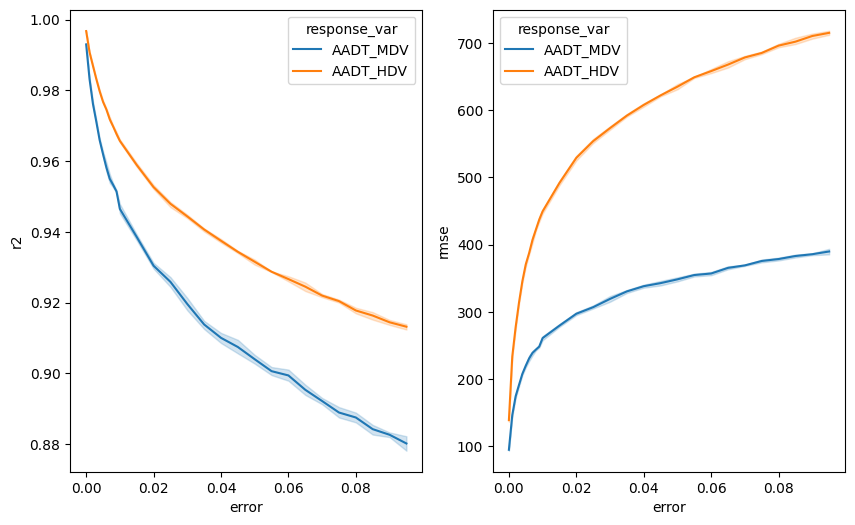

In [8]:
fig, ax = plt.subplots(1, 2, figsize = (10, 6))

sns.lineplot(data = df_Y, x = 'error', y = 'r2', hue = 'response_var', ax = ax[0])
sns.lineplot(data = df_Y, x = 'error', y = 'rmse', hue = 'response_var', ax = ax[1])

In [ ]:
df_X = pd.DataFrame(results_response_perturb)

In [ ]:
df_Y.to_csv('senstitivity_Y.csv', index = False)
df_X.to_csv('senstitivity_X.csv', index = False)